This Machine Learning project aims to work on the process of Customer Churn Prediction.
Customer Churn refers to the percentage of customers that stopped using the products of a company during a certain interval of time.

This project has been done by Arghya Bhattacharya as a part of the Machine Learning Internship program of CodSoft.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

The csv file is being read using 'df'.

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

The various features of the dataset are being studied and vital information points are being noted.

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

The dataset is being checked for having 'null' values.

In [ ]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

At this point, it is apparent that the dataset is has no null values.

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


EDA is being performed on the data to reveal certain trends that may prove useful.

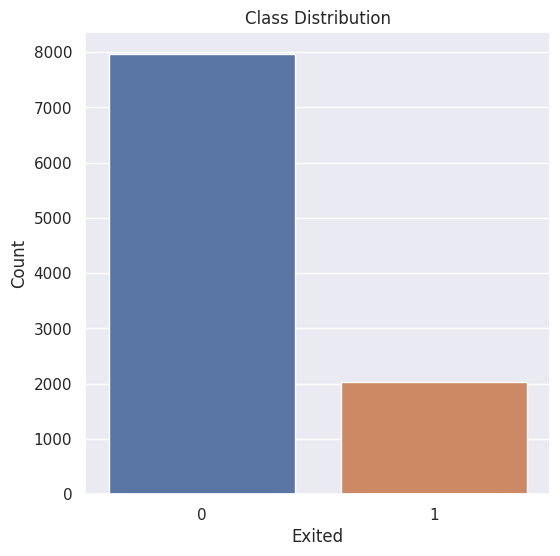

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Exited', data=df)
plt.title('Class Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

The class distribution table makes it apparent that the dataset is not unbalanced.

<Axes: xlabel='Age', ylabel='count'>

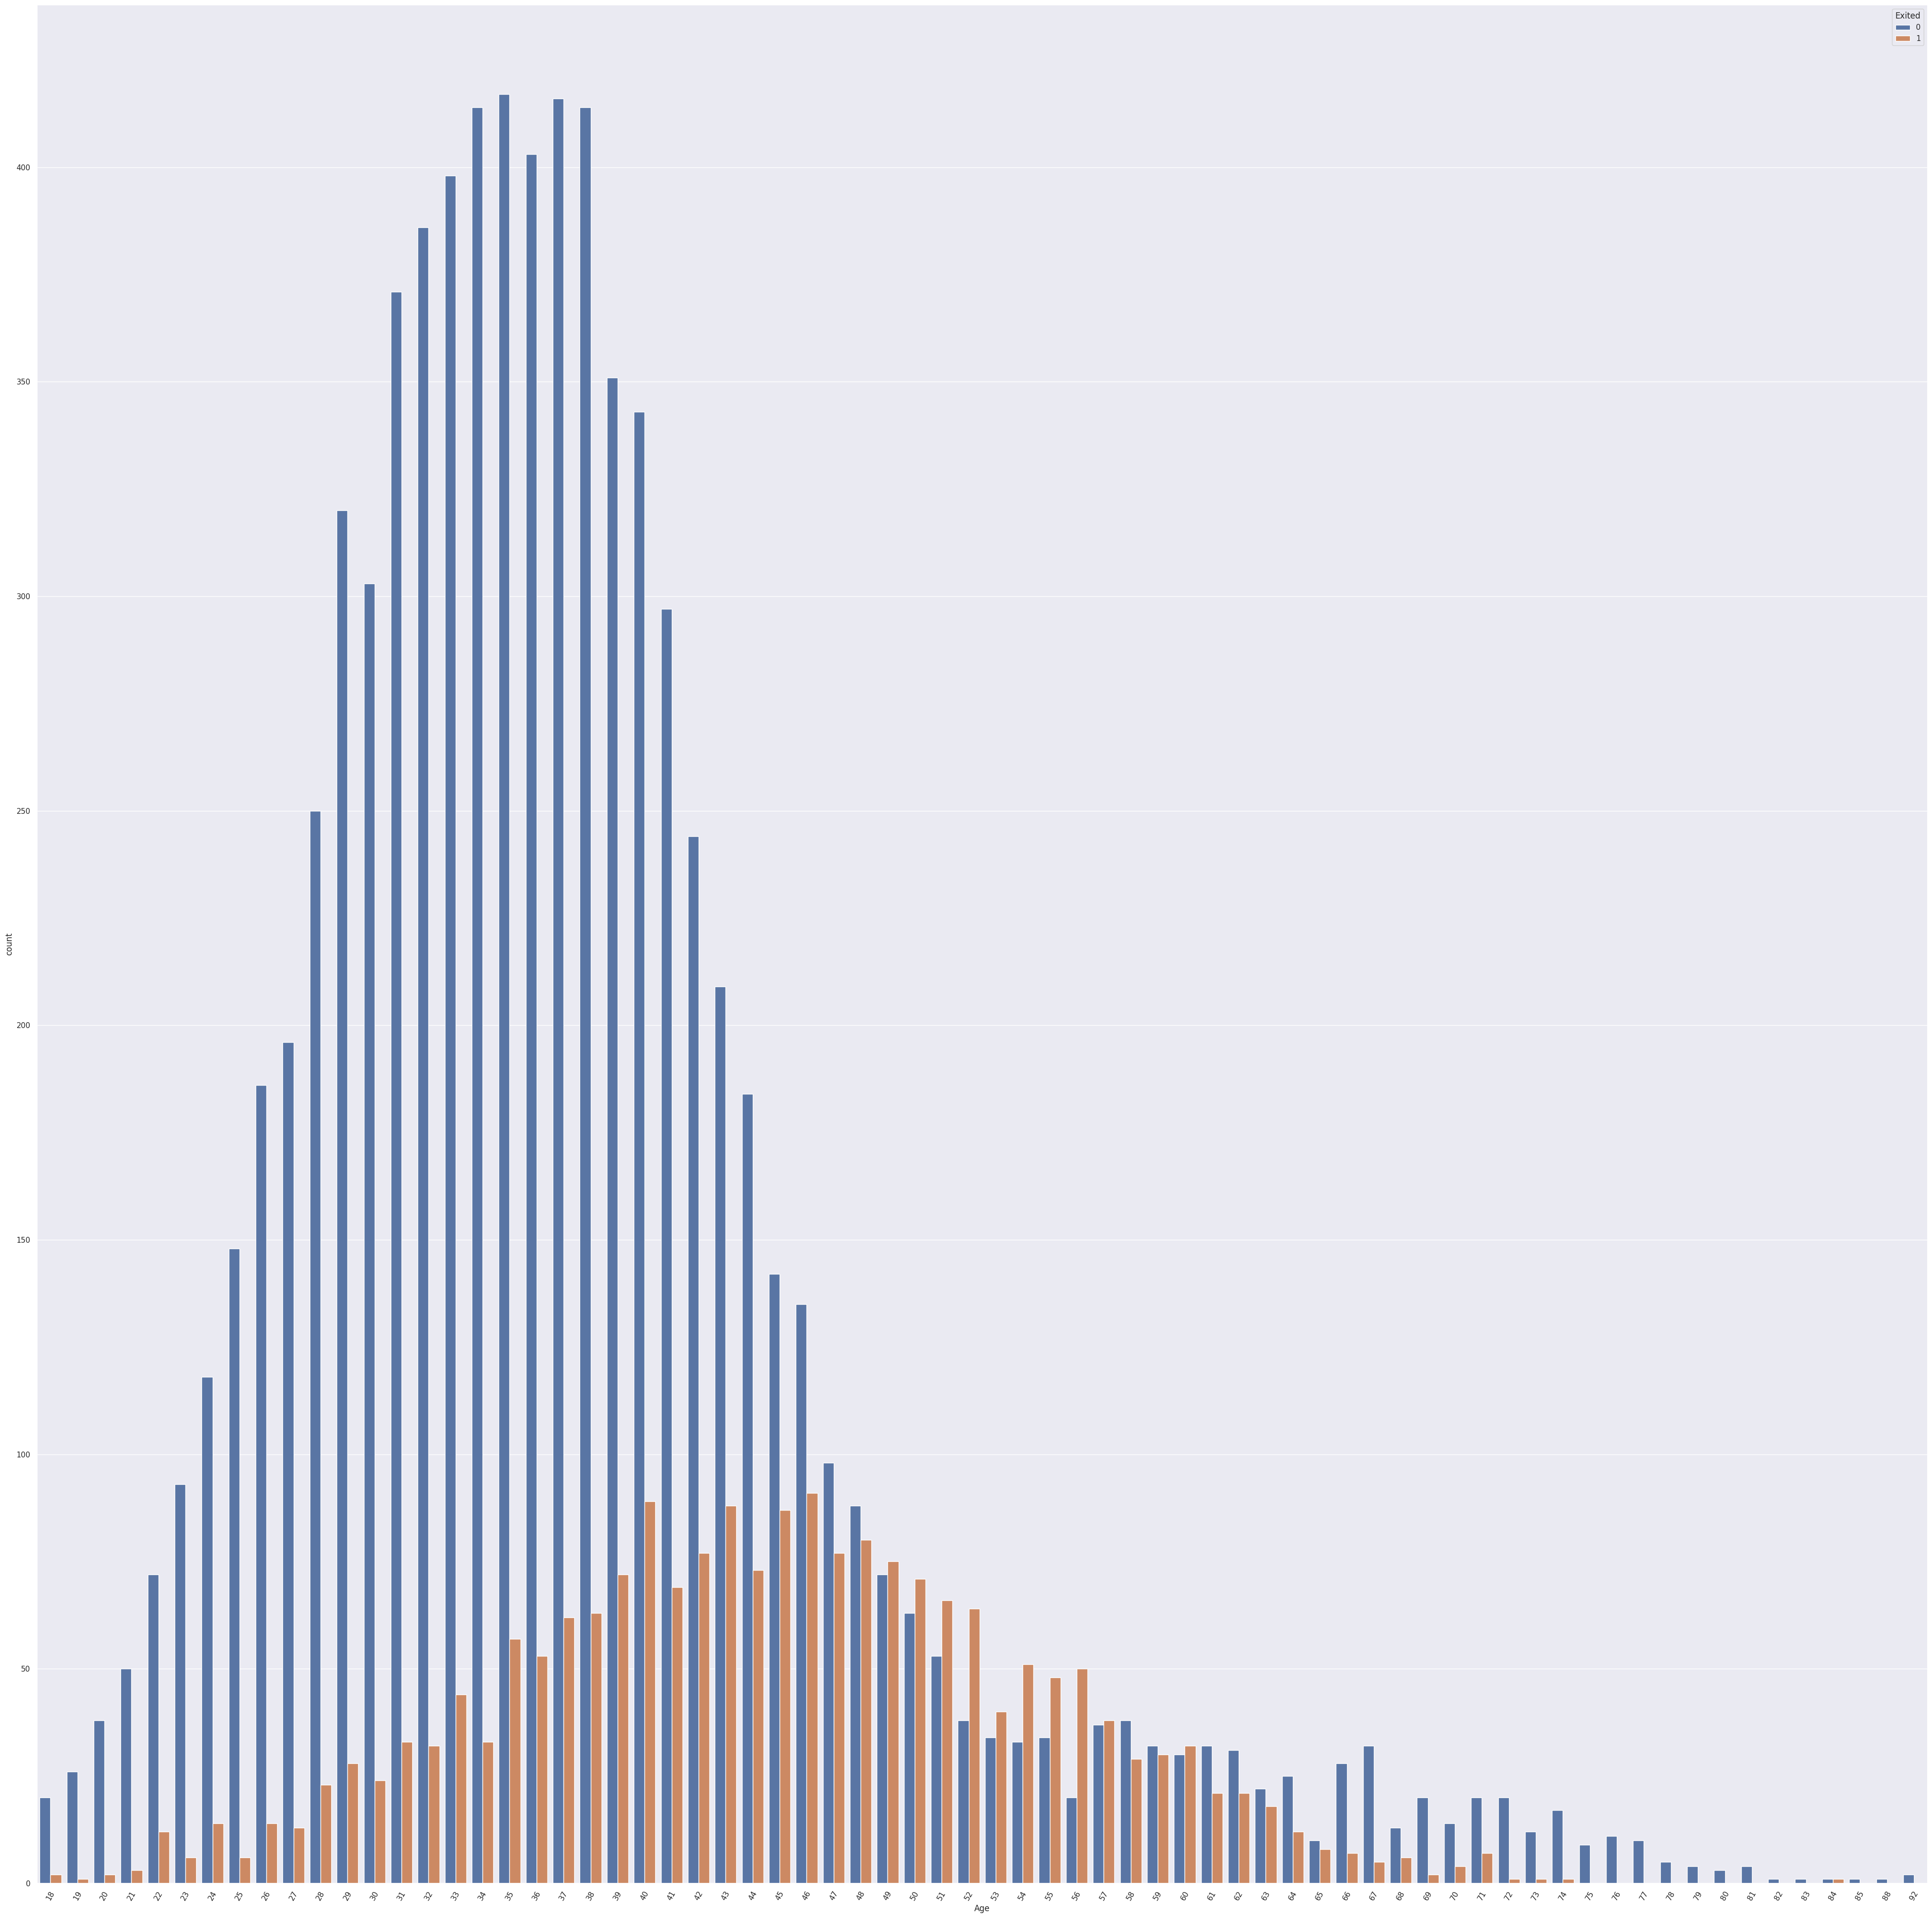

In [ ]:
plt.figure(figsize = (50,50))
plt.xticks(rotation = 60)
sns.countplot(x = 'Age', hue = 'Exited', data = df)

The chart above proves that the churn rate steadily increases from the age of 22 and peaks at the age of 45 and then steadily gets reduced again.
This is an interesting point to note as it gives us a key insight regarding the age group of customers who are more likely to not remain in the ecosystem of the company for extended periods of time.

<Axes: xlabel='Tenure', ylabel='count'>

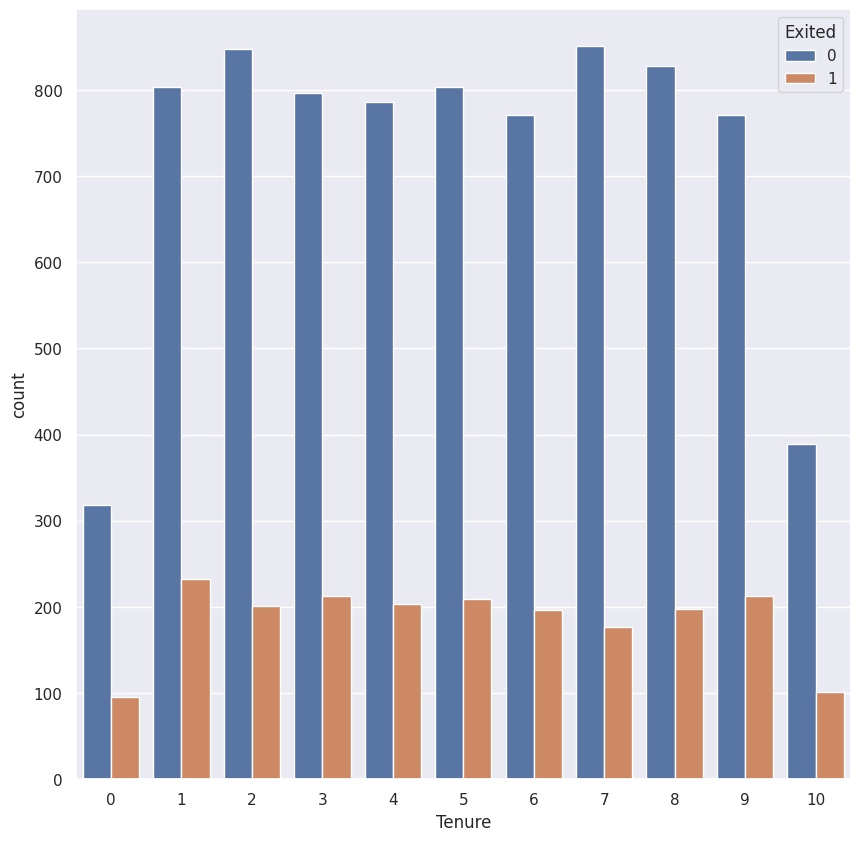

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Tenure', hue = 'Exited', data = df)

The chart above provides vital inferences regarding the tenures of customers who are most likely to leave the ecosystem of the company.
It is to be noted that the customers who have been around for a year are most likely to leave.

<Axes: xlabel='NumOfProducts', ylabel='count'>

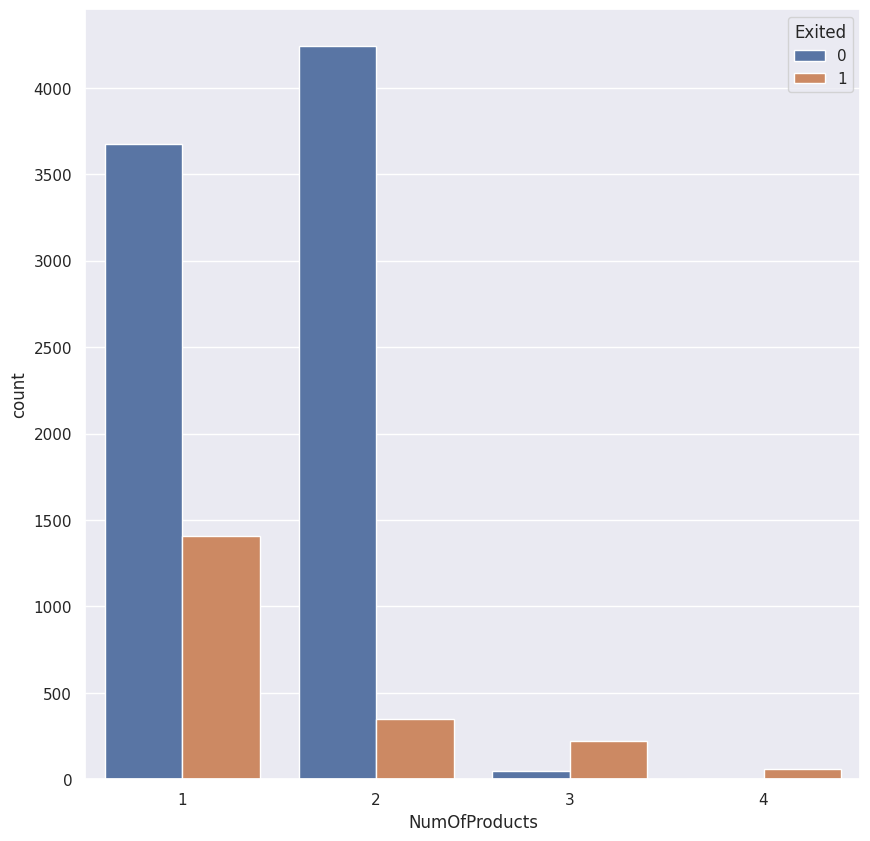

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'NumOfProducts', hue = 'Exited', data = df)

The chart above proves that customers who buy more products are less likely to leave.

<Axes: xlabel='IsActiveMember', ylabel='count'>

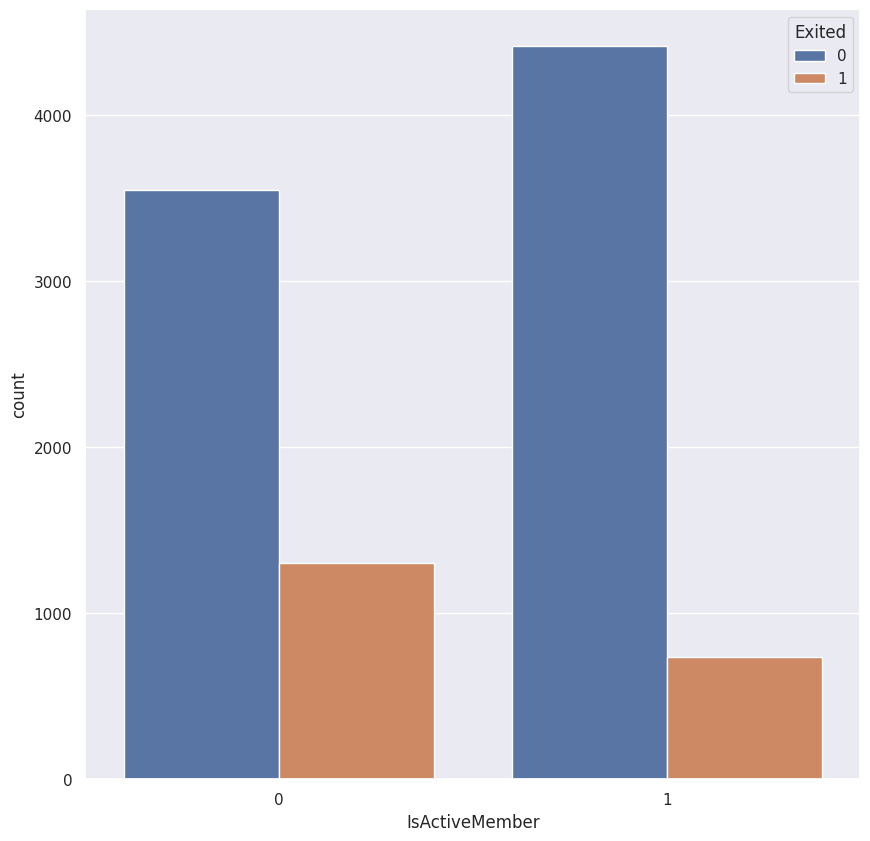

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df)

In [ ]:
x = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']
x = pd.get_dummies(x, columns=['Geography', 'Gender'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50) # The training and testing data are being separated and being readied.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# Data pre-processing
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression

From here on out, various classification models are being used to work on the data to find out which one of the models is providing the highest accuracy.

In [ ]:
LogReg= LogisticRegression()

In [ ]:
LogReg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred_Log= LogReg.predict(x_test)

In [ ]:
print('  Accuracy via Logistic Regression : ', accuracy_score(y_test, pred_Log))

  Accuracy via Logistic Regression :  0.8166666666666667


In [ ]:
classiLogReg=classification_report(y_test,pred_Log)

In [ ]:
print("Classification Report via Logistic Regression: ", classiLogReg)

Classification Report via Logistic Regression:                precision    recall  f1-score   support

           0       0.84      0.96      0.89      2401
           1       0.60      0.25      0.35       599

    accuracy                           0.82      3000
   macro avg       0.72      0.60      0.62      3000
weighted avg       0.79      0.82      0.78      3000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(max_depth = 50, random_state = 100)
dct.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [ ]:
pred_dct=dct.predict(x_test)
print('Accuracy via Decision Tree Classifier : ', accuracy_score(y_test, pred_dct))

Accuracy via Decision Tree Classifier :  0.7856666666666666


In [ ]:
classiDct=classification_report(y_test,pred_dct)
print("Classification Report via Decision Tree Classifier: ", classiDct)

Classification Report via Decision Tree Classifier:                precision    recall  f1-score   support

           0       0.88      0.85      0.86      2401
           1       0.47      0.54      0.50       599

    accuracy                           0.79      3000
   macro avg       0.67      0.69      0.68      3000
weighted avg       0.80      0.79      0.79      3000



In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators = 20)
xg.fit(x_train, y_train)
pred_xg=xg.predict(x_test)
print('Accuracy via XGBOOST Classifier: ', accuracy_score(y_test,pred_xg))

Accuracy via XGBOOST Classifier:  0.861


In [ ]:
classiXg=classification_report(y_test,pred_xg)
print("Classification Report via XGBOOST Classifier: ", classiXg)

Classification Report via XGBOOST Classifier:                precision    recall  f1-score   support

           0       0.89      0.95      0.92      2401
           1       0.71      0.51      0.60       599

    accuracy                           0.86      3000
   macro avg       0.80      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state = 2)
rf.fit(x_train, y_train)
pred_rf=rf.predict(x_test)
print('Accuracy via Random Forest Classifier: ',accuracy_score(y_test,pred_rf))

Accuracy via Random Forest Classifier:  0.848


In [ ]:
classiRf=classification_report(y_test,pred_rf)
print("Classification Report via RandomForest Classifier: ", classiRf)

Classification Report via RandomForest Classifier:                precision    recall  f1-score   support

           0       0.87      0.95      0.91      2401
           1       0.68      0.44      0.54       599

    accuracy                           0.85      3000
   macro avg       0.78      0.70      0.72      3000
weighted avg       0.83      0.85      0.83      3000



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()
nb.fit(x_train, y_train)
pred_nb=nb.predict(x_test)
print('Accuracy via Naive Bayes Classifier: ',accuracy_score(y_test,pred_nb))

Accuracy via Naive Bayes Classifier:  0.828


In [ ]:
classiNb=classification_report(y_test,pred_nb)
print("Classification Report via RandomForest Classifier: ", classiNb)

Classification Report via RandomForest Classifier:                precision    recall  f1-score   support

           0       0.86      0.94      0.90      2401
           1       0.61      0.38      0.47       599

    accuracy                           0.83      3000
   macro avg       0.73      0.66      0.68      3000
weighted avg       0.81      0.83      0.81      3000



After finding out the results of all the models, it is clearly observable that the XGBoost Classifier is providing the highest accuracy (86.10 %).